ANOMALY TRANSFORMER: TIME SERIES ANOMALY DETECTION WITH ASSOCIATION DISCREPANCY

### METHOD
d 測定値の連続システムを監視し、時間の経過とともに等間隔の観測値を記録するとします。
観測された時系列 X は、一連の時点 {x1, x2, ··· , xN } で表されます。ここで、xt ∈ R^d は時間 t の観測を表します。
教師なし時系列異常検出問題は、ラベルなしで xt が異常であるかどうかを判断することです。

前述のように、有益な表現を学習し、識別可能な基準を見つけることとして、教師なし時系列異常検出の鍵を強調します。
より有益な関連付けを発見し、本質的に正常と異常を区別できる関連付けの不一致を学習することでこの問題に取り組むために、異常トランスフォーマーを提案します。
技術的には、以前の関連付けと系列の関連付けを具現化する Anomaly-Attention と、より識別可能な関連付けの不一致を取得するためのミニマックス最適化戦略を提案します。
アーキテクチャと共同設計し、学習した関連付けの不一致に基づいて関連付けベースの基準を導き出します。

#### ANOMALY TRANSFORMER
異常検出のための Transformer の制限 (Vaswani et al., 2017) を考慮して、私たちはバニラ アーキテクチャを Anomaly-Attention メカニズムを備えた Anomaly Transformer (図 1) に刷新します。

##### Overall Architecture
Anomaly Transformer は、Anomaly-Attention ブロックとフィードフォワード層を交互に積み重ねることが特徴です。
この積み重ね構造は、深いマルチレベルの特徴から基になる関連付けを学習するのに役立ちます。
モデルに長さ入力時系列 X ∈ RN×d を持つ L 層が含まれているとします。
l 番目の層の全体的な方程式は、次のように形式化されます。

N×dmodel , l ∈ {1, ··· , L} は、dmodel チャネルを持つ l 番目の層の出力を示します。
初期入力 X0 = Embedding(X ) は、埋め込まれた生の系列を表します。
Zl ∈ RN×dmodel は l 番目の層の隠れ表現です。
Anomaly-Attention(・) は、関連付けの不一致を計算することです。

##### Anomaly-Attention

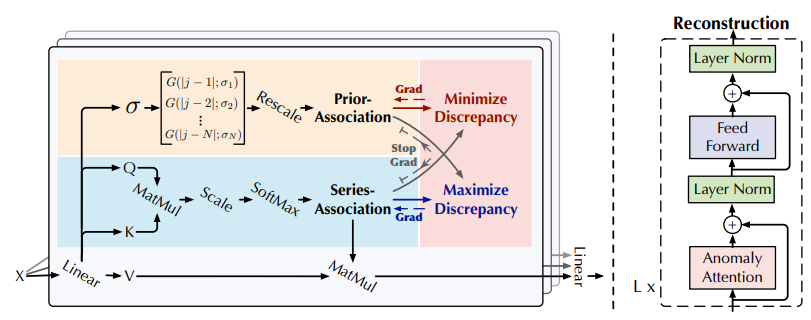

単一ブランチの自己注意メカニズム (Vaswani et al., 2017) は、事前関連付けと系列関連付けを同時にモデル化できないことに注意してください。
2分岐構造のAnomaly-Attentionを提案します（図1）。
事前関連付けについては、学習可能なガウス カーネルを採用して、相対的な時間的距離に関して事前を計算します。ガウス カーネルの単峰性を利用して、この設計は構造的に隣接する地平線により多くの注意を払うことができます。
また、ガウス カーネルに学習可能なスケール パラメーター σ を使用して、異常セグメントの長さの違いなど、事前関連付けをさまざまな時系列パターンに適応させます。
シリーズ関連ブランチは、生のシリーズから関連を学習することであり、最も効果的な関連を適応的に見つけることができます。これらの 2 つの形式は、各時点の一時的な依存関係を維持することに注意してください。これは、ポイントごとの表現よりも有益です。
それらはまた、隣接濃度事前および学習された実際の関連付けをそれぞれ反映し、その不一致は正常と異常を区別できるものとします。
l 番目のレイヤーの Anomaly-Attention は次のとおりです。


ここで、Q、K、V ∈ RN×dmodel 、σ ∈ RN×1 は、それぞれクエリ、キー、自己注意の値、および学習した尺度を表します。 WlQ, WlK,WlV ∈ Rdmodel×dmodel , Wlσ ∈ Rdmodel×1 はそれぞれ l 番目の層の Q, K, V, σ のパラメータ行列を表します。
事前連想 Pl ∈ RN×N は、学習したスケール σ ∈ RN×1 に基づいて生成され、i 番目の要素 σi は i 番目の時点に対応します。
具体的には、i 番目の時点について、その j 番目の時点への関連付けの重みがガウス カーネル G(|j − i|; σi) によって計算されます。
さらに、Rescale(・) を使用して、行の合計を除算することにより、関連付けの重みを離散分布 Pl に変換します。
Sl ∈ RN×N は系列結合を表します。
Softmax(・) は、アテンション マップを最後の次元に沿って正規化します。


したがって、Sl の各行は離散分布を形成します。
Zbl ∈ RN×dmodel は、l 番目の層の Anomaly-Attention の後の隠れ表現です。
Anomaly-Attention(・) を使用して式 2 を要約します。
私たちが使用するマルチヘッド バージョンでは、学習したスケールは σ ∈ RN×h です。
hヘッド用。
Qm、Km、Vm ∈ RN×dmodel/h は、それぞれ m 番目のヘッドのクエリ、キー、および値を示します。
ブロックは、複数のヘッドからの出力 {Zblm ∈ RN×dmodel/h }1≤m≤h を連結し、最終結果 Zbl ∈ RN×dmodel を取得します。

##### Association Discrepancy
アソシエーションの不一致を、事前アソシエーションと系列アソシエーションの間の対称化された KL ダイバージェンスとして形式化します。これは、これら 2 つの分布間の情報ゲインを表します (Neal, 2007)。
複数のレイヤーからの関連付けの不一致を平均して、マルチレベルの機能からの関連付けを組み合わせて、次のようなより有益な尺度にします。


ここで、KL(·k·) は、Pl と Sl のすべての行に対応する 2 つの離散分布間で計算された KL ダイバージェンスです。
AssDis(P, S; X ) ∈ RN×1 は、複数層からの事前関連付け P および系列関連付け S に関する X の点ごとの関連付けの不一致です。
results の i 番目の要素は、 X の i 番目の時点に対応します。 以前の観察から、異常は通常の時点よりも小さい AssDis(P, S; X ) を示すため、AsDis は本質的に区別可能になります。

####  MINIMAX ASSOCIATION LEARNING
教師なしタスクとして、モデルを最適化するために再構成損失を使用します。
再構築の損失は、シリーズの関連付けを導き、最も有益な関連付けを見つけます。
正常な時点と異常な時点の差をさらに拡大するために、追加の損失を使用して関連性の不一致を拡大します。
前の関連付けの単一モードのプロパティにより、不一致の損失により、シリーズの関連付けが非隣接領域により注意を払うようになります。これにより、異常の再構築が難しくなり、異常がより識別可能になります。
入力系列 X ∈ RN×d の損失関数は次のように形式化されます。


ここで、X ∈ RN×d は X の再構成を表します。
k·kF、k·kk はフロベニウスと k-ノルムを示します。
λ は、損失条件をトレードオフすることです。
λ > 0 の場合、最適化は関連付けの不一致を拡大することです。
関連付けの不一致をより識別しやすくするために、ミニマックス戦略が提案されています。

##### Minimax Strategy

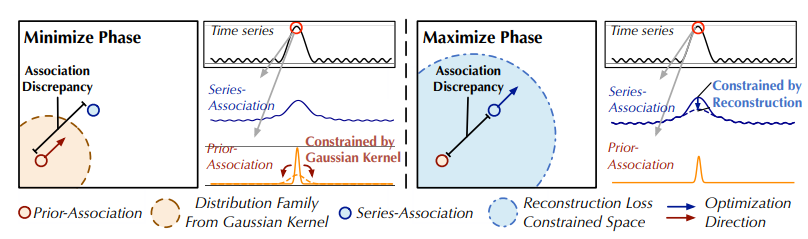

アソシエーションの不一致を直接最大化すると、ガウス カーネルのスケール パラメーターが大幅に減少し (Neal、2007)、以前のアソシエーションが無意味になることに注意してください。
連想学習のより良い制御に向けて、ミニマックス戦略を提案します (図 2)。
具体的には、最小化フェーズでは、事前関連付け Pl を駆動して、生の系列から学習した系列関連付け Sl を近似します。
このプロセスにより、以前の関連付けがさまざまな時間パターンに適応します。
最大化フェーズでは、シリーズの関連付けを最適化して、関連付けの不一致を拡大します。
このプロセスにより、シリーズ アソシエーションは、隣接していない地平線により多くの注意を払うようになります。
したがって、再構成損失を統合すると、2 つのフェーズの損失関数は次のようになります。

ここで、λ > 0 であり、detach は、関連付けの勾配逆伝播を停止することを意味します (図 1)。
P は最小化フェーズで Sdetach を近似するため、最大化フェーズでは系列関連に対してより強い制約が適用され、時点が隣接していない領域により多くの注意を払うようになります。
再構築損失の下では、これは異常が通常の時点よりも達成するのがはるかに困難であるため、関連性の不一致の正常と異常の識別可能性が増幅されます

##### Association-based Anomaly Criterion
正規化された関連付けの不一致を再構成基準に組み込みます。これにより、時間的表現と識別可能な関連付けの不一致の両方の利点が得られます。
X ∈ RN×d の最終的な異常スコアは次のように示されます。


ここで、〇は要素ごとの乗算です。
AnomalyScore(X ) ∈ RN×1 は、X の点ごとの異常基準を示します。
より良い再構成に向けて、異常は通常、関連付けの不一致を減らしますが、それでもより高い異常スコアが得られます。
したがって、この設計により、再構成エラーと関連付けの不一致を連携させて、検出パフォーマンスを向上させることができます。



#### Implementation details
シェンらで確立されたプロトコルに従います。 (2020)、重複しないスライディング ウィンドウを採用して、サブシリーズのセットを取得します。スライディング ウィンドウは、すべてのデータセットで 100 の固定サイズです。
異常スコア (式 6) が特定のしきい値 δ より大きい場合、その時点を異常としてラベル付けします。
しきい値 δ は、異常としてラベル付けされた検証データセットの r 比率データを作成するように決定されます。
主な結果として、SWaT では r = 0.1%、SMD では 0.5%、その他のデータセットでは 1% を設定しました。
広く使用されている調整戦略を採用しています (Xu et al., 2018; Su et al., 2019; Shen et al., 2020): 特定の連続する異常セグメントの時点が検出された場合、この異常セグメントのすべての異常が検出されます。正しく検出されていると見なされます。
この戦略は、異常な時点でアラートが発生し、さらにセグメント全体が実際のアプリケーションで認識されるようになるという観察から正当化されます。
Anomaly Transformer には 3 つのレイヤーが含まれています。
隠れ状態のチャネル数 dmodel を 512 に設定し、ヘッド数 h を 8 に設定します。ハイパーパラメーター λ (式 4) は、損失関数の 2 つの部分をトレードオフするために、すべてのデータセットに対して 3 に設定されます。 ADAM (Kingma & Ba, 2015) オプティマイザを初期学習率 10−4 で使用します。
トレーニング プロセスは、バッチ サイズ 32 で 10 エポック以内に早期に停止されます。すべての実験は、単一の NVIDIA TITAN RTX 24GB GPU を使用して Pytorch (Paszke et al., 2019) で実装されます。

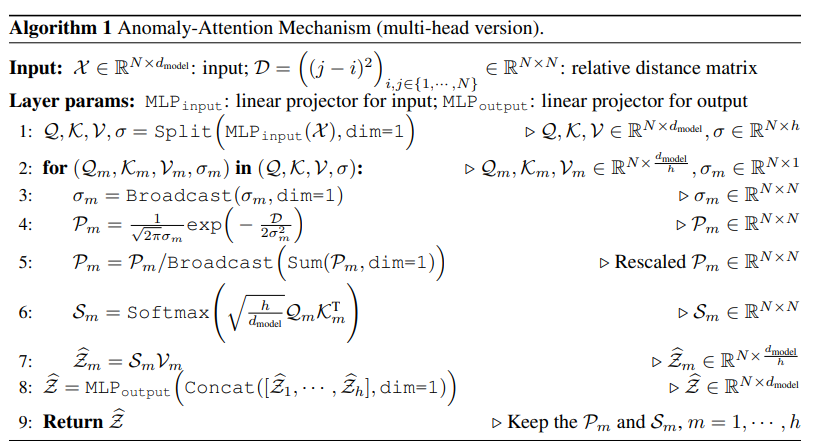